# <center>  ACP and T-SNE

In [29]:
# Librairies

import pandas as pd
import numpy as np
from scipy.stats import norm, multivariate_normal  
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## PCA

In [22]:
n = 100
mean = np.array([0 for i in range(n)])
cov = np.eye(n) 
col = ['X'+str(i) for i in range(n)]
X_1 = pd.DataFrame(np.random.multivariate_normal(mean, cov, (500)),columns=col)
X_1['Class'] = 0
X_2 = pd.DataFrame(np.random.multivariate_normal(mean+3, cov+3, (500)),columns=col)
X_2['Class'] = 1
X = X_1.append(X_2).reset_index(drop=True)

In [28]:
X.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X91,X92,X93,X94,X95,X96,X97,X98,X99,Class
0,0.992677,1.024940,-1.004679,-1.784244,-0.454274,0.652249,0.082473,-0.825379,1.027279,-0.782146,...,1.474556,0.548920,0.348400,0.342333,-0.375394,0.643337,0.767421,1.000767,0.654833,0
1,-0.221897,0.586789,-2.229145,0.530946,0.137941,0.895821,-1.372307,0.330258,-0.422424,0.909893,...,-0.622982,0.578996,1.406149,-0.194096,-0.298877,0.954066,-1.108368,-1.031375,0.526568,0
2,0.358967,-1.325310,-0.183990,-1.027018,0.001310,0.879910,-0.542977,-0.583433,0.549300,0.057313,...,-0.407905,0.732545,-0.209770,0.673910,-0.201056,1.407571,0.404517,1.274961,-0.518904,0
3,0.401007,0.608645,-0.793395,-1.424154,1.054129,-0.048131,0.851514,-0.365750,-0.656757,-0.222221,...,1.478722,-1.315177,-0.812957,1.629580,-1.104492,-0.630971,1.225385,0.231983,0.152369,0
4,-0.209961,-0.404783,-0.739106,-0.302144,0.513469,1.095770,0.069271,0.207066,-1.432717,-1.256185,...,-0.953320,-0.777806,1.121742,1.104049,-0.696823,0.150298,1.264345,1.702576,-1.268292,0


In [24]:
n_components = 2
pca = PCA(n_components=n_components,random_state=42)
pca_fit = pca.fit(X.iloc[:,:100])
print(f"var explained : {np.sum(pca_fit.explained_variance_ratio_)}")
pca_trans = pca.fit_transform(X)
pca_trans

var explained : 0.7925906986193905


array([[-14.49227702,  -0.37042734],
       [-14.59006876,  -0.16379936],
       [-15.45934118,  -1.40132208],
       ...,
       [ 18.98422906,   0.18939001],
       [ 19.35947347,   0.9171924 ],
       [ -7.242631  ,  -0.86336643]])

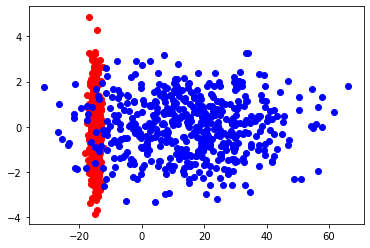

In [25]:
plt.scatter(x=pca_trans[:500,:1],y=pca_trans[:500,1:2],c="red")
plt.scatter(x=pca_trans[500:,:1],y=pca_trans[500:,1:2],c="blue")

In [26]:
var_explained = []
n_comp = []
for i in range(2,50):
    n_components = i
    pca_i = PCA(n_components=n_components,random_state=42)
    pca_fit_i = pca_i.fit(X.iloc[:,:100])
    var_explained.append(np.sum(pca_fit_i.explained_variance_ratio_))
    n_comp.append(i)

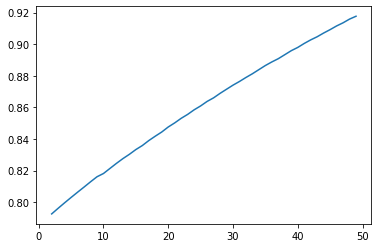

In [27]:
plt.plot(n_comp,var_explained)

## t-SNE

In [30]:
tsne = TSNE(n_components=2)

In [33]:
tsne_fit = tsne.fit_transform(X.iloc[:,:100])

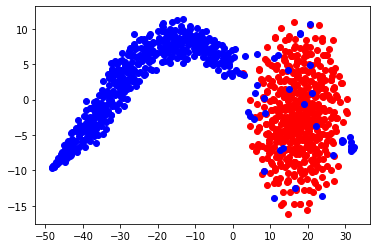

In [35]:
plt.scatter(x=tsne_fit[:500,:1],y=tsne_fit[:500,1:2],c="red")
plt.scatter(x=tsne_fit[500:,:1],y=tsne_fit[500:,1:2],c="blue")